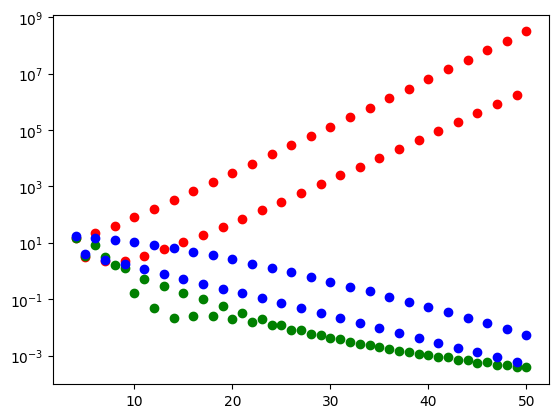

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import mpmath as mp
from random import uniform

def f1(x):
    return 1/(1+25*x*x)

def f2(x):
    return mp.exp(mp.cos(x))

def lagrange_polynomial(x_values, y_values, x):
    sol = 0
    t = 0
    for i in range(0, len(x_values)):
        t = 1
        for j in range(0, len(y_values)):
            if(j != i):
                t = t*((x-x_values[j])/(x_values[i]-x_values[j]))
        sol += t*y_values[i]
    return sol

#transforms chebyshew points to interval [a,b]

def transform_cheb(nodes, a, b):
    for i in range(len(nodes)):
        nodes[i] = a+(b-a)*(nodes[i]+1)/2
    return nodes
#calculates n standard chebyshew points on interval[1,1]
  
def get_nodes_cheb(n):
    nodes = np.empty(shape=n, dtype=float)
    for i in range(n):
        nodes[i] = np.cos(np.pi*(2*i+1)/(2*n+2))
    return nodes

#gets n equidistant nodes in interval [a,b] 

def get_eqdist(n, a, b):
    nodes = np.empty(shape=n, dtype=float)
    h = (b-a)/n
    for i in range(n):
        nodes[i] = a+h*i        
    nodes[n-1] = b
    return nodes

#calculates sigmas in matrix equation (strona 17)

def qubic_simas_hs(nodes, y_values):
    n = len(nodes) - 1
    hs = np.zeros(shape=n)
    for i in range(n):
        hs[i] = nodes[i+1] - nodes[i]
    h_matrix = np.zeros(shape=(n+1, n+1))
    h_matrix[0][0] = -hs[0]
    h_matrix[0][1] = hs[0]
    h_matrix[n-1][n-2] = hs[n-1]
    h_matrix[n][n] = -hs[n-1]
    for i in range(1,n):
        h_matrix[i][i-1] = hs[i-1]
        h_matrix[i][i] = 2*(hs[i-1]+hs[i])
        h_matrix[i][i+1] = hs[i]
    a = coefficient(nodes, y_values)
    b = coefficient(nodes[n-3:], y_values[n-3:])
    d_matrix = np.zeros(shape=n+1)
    d_matrix[0] = hs[0]*hs[0]*a[3]
    d_matrix[n] = -hs[n-1]*hs[n-1]*b[3]
    for i in range(1,n):
        d_matrix[i] = (y_values[i+1]-y_values[i])/hs[i] - (y_values[i]-y_values[i-1])/hs[i-1]
    return np.linalg.solve(h_matrix,d_matrix),hs

def coefficient(x, y):
    """
    x: list or np array contanining x data points
    y: list or np array contanining y data points
    """

    m = len(x)
    x = np.array(x,dtype=float)
    a = np.array(y,dtype=float)
    for k in range(1, m):
        a[k:m] = (a[k:m] - a[k - 1])/(x[k:m] - x[k - 1])
    return a

def spline_value(nodes, y_values, sigmas, hs, x):
    n = len(nodes)
    if x < nodes[0] or x > nodes[n-1]:
        return None
    for i in range(0,n-1):
        if nodes[i] <= x <= nodes[i+1]:
            k = i
    b = (y_values[k+1]-y_values[k])-hs[k]*(sigmas[k+1]+2*sigmas[k])
    c = 3*sigmas[k]
    d = (sigmas[k+1]-sigmas[k])/hs[k]
    return y_values[k] + b*(x-nodes[k]) + c*((x-nodes[k])**2) + d*((x-nodes[k])**3)

if __name__ == "__main__":
    # sig, hs = qubic_simas_hs(x, y)
    # print(spline_value(x,y,sig,hs,))
    # mat
    # x_eq = get_eqdist(12,0,2*mp.pi)
    # y_eq = [f2(x) for x in x_eq]
    # x_ch = transform_cheb(get_nodes_cheb(12),0,2*mp.pi)
    # y_ch = [f2(x) for x in x_ch]
    # sig, hs = qubic_simas_hs(x_eq, y_eq)
    
    # x_space = np.arange(0, 2*mp.pi, 1/120)
    # y_edist_spl = [spline_value(x_eq,y_eq,sig,hs,x) for x in x_space]
    # y_eqdist_lag = [lagrange_polynomial(x_eq,y_eq,x) for x in x_space]
    # y_cheb_lag = [lagrange_polynomial(x_ch,y_ch,x) for x in x_space]
    # print(f2(1))
    # # plt.semilogy()
    # plt.plot(x_space,y_eqdist_lag, color="r")
    # plt.plot(x_space,y_cheb_lag, color="g")
    # plt.plot(x_space,[f2(x) for x in x_space],color="b")
    # cs = interpolate.CubicSpline(x_eq,y_eq)
    # plt.plot(x_space,cs(x_space),color="black")
    err1 = np.empty(47)
    err2 = np.empty(47)
    err3 = np.empty(47)
    err_eqdist_lag = np.empty(500)
    err_cheb_lag = np.empty(500)
    err_cs = np.empty(500)
    x_set = np.empty(500)
    for j in range(500):
        x_set[j] = uniform(-1,1)
    for i in range(4,51):
        x_eq = get_eqdist(i,-1,1)
        y_eq = [f1(x) for x in x_eq]
        x_ch = transform_cheb(get_nodes_cheb(i), -1, 1)
        y_ch = [f1(x) for x in x_ch]
        y_eqdist_lag = [lagrange_polynomial(x_eq,y_eq,x) for x in x_set]
        y_cheb_lag = [lagrange_polynomial(x_ch,y_ch,x) for x in x_set]
        cs = interpolate.CubicSpline(x_eq,y_eq)
        y_cs = [cs(x) for x in x_set]

        for j in range(500):
            err_eqdist_lag[j] = abs(y_eqdist_lag[j] - f1(x_set[j]))
            err_cheb_lag[j] = abs(y_cheb_lag[j] - f1(x_set[j]))
            err_cs[j] = abs(y_cs[j] - f1(x_set[j]))
        err1[i-4] = np.linalg.norm(err_eqdist_lag)
        err2[i-4] = np.linalg.norm(err_cs)
        err3[i-4] = np.linalg.norm(err_cheb_lag)
        # print(np.linalg.norm(err_eqdist_lag))
        # print(np.linalg.norm(err_cs))
        # break
    
    plt.semilogy()
    plt.scatter([i for i in range(4, 51)], err1, color='r')
    plt.scatter([i for i in range(4, 51)], err2, color='g')
    plt.scatter([i for i in range(4, 51)], err3, color='b')
    pass

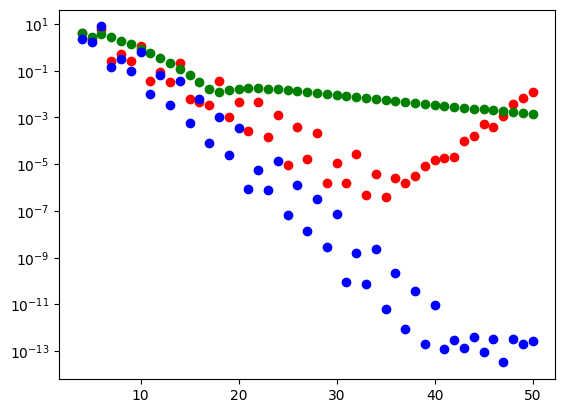

In [8]:
err1 = np.empty(47)
err2 = np.empty(47)
err3 = np.empty(47)
err_eqdist_lag = np.empty(500)
err_cheb_lag = np.empty(500)
err_cs = np.empty(500)
x_set = np.empty(500)
for j in range(500):
    x_set[j] = uniform(0,2*mp.pi)
for i in range(4,51):
    x_eq = get_eqdist(i,0, 2*mp.pi)
    y_eq = [f2(x) for x in x_eq]
    x_ch = transform_cheb(get_nodes_cheb(i), 0, 2*mp.pi)
    y_ch = [f2(x) for x in x_ch]
    y_eqdist_lag = [lagrange_polynomial(x_eq,y_eq,x) for x in x_set]
    y_cheb_lag = [lagrange_polynomial(x_ch,y_ch,x) for x in x_set]
    cs = interpolate.CubicSpline(x_eq,y_eq)
    y_cs = [cs(x) for x in x_set]

    for j in range(500):
        err_eqdist_lag[j] = abs(y_eqdist_lag[j] - f2(x_set[j]))
        err_cheb_lag[j] = abs(y_cheb_lag[j] - f2(x_set[j]))
        err_cs[j] = abs(y_cs[j] - f2(x_set[j]))
    err1[i-4] = np.linalg.norm(err_eqdist_lag)
    err2[i-4] = np.linalg.norm(err_cs)
    err3[i-4] = np.linalg.norm(err_cheb_lag)
    # print(np.linalg.norm(err_eqdist_lag))
    # print(np.linalg.norm(err_cs))
    # break
plt.semilogy()
plt.scatter([i for i in range(4, 51)], err1, color='r')
plt.scatter([i for i in range(4, 51)], err2, color='g')
plt.scatter([i for i in range(4, 51)], err3, color='b')